In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
from dateutil.relativedelta import relativedelta
import datetime


In [2]:
df_loan = pd.read_csv("./data-set/loan.csv")

### Phase 1 : Data Understanding

In [3]:
# List Columns 
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

*__Our Understanding of few key columns__*

<table>
<thead>
<tr>
  <th>Column Name</th>
  <th>Details</th>
</tr>
</thead>
<tbody>
<tr><td>collections_12_mths_ex_med</td><td>Number of collections in 12 months excluding medical collections. Can be ignored, mostly NA/0 values</td></tr>
<tr><td>funded_amnt</td><td>Amount that was funded by the investors. In few cases this will be lesser than the Loan Amount, the remianing amount is problably lent by LC dirctly</td></tr>
<tr><td>int_rate</td><td>Interest Rate on the loan</td></tr>
<tr><td>last_pymnt_amnt</td><td>Last total payment amount received. This will be 0 for Charged off</td></tr>
<tr><td>last_pymnt_d</td><td>Last month payment was received</td></tr>
<tr><td>loan_status</td><td>Current status of the loan</td></tr>
<tr><td>mths_since_last_major_derog</td><td>Months since most recent 90-day or worse rating</td></tr>
<tr><td>mths_since_last_record</td><td>months since the last (derogatory) public  records</td></tr>
<tr><td>open_acc</td><td>The number of open credit lines in the borrower's credit file. Ranges from 2 - 44</td></tr>
<tr><td>out_prncp_inv</td><td>Remaining outstanding principal for portion of total amount funded by investors</td></tr>
<tr><td>pub_rec</td><td>Number of derogatory public records.Another piece of data Lending Club provides is the number of public records on file. This is pulled from the credit report, so don’t confuse it with criminal public records. Credit report public records are things like bankruptcy, foreclosure, tax liens, and past-due child support.</td></tr>
<tr><td>recoveries</td><td>Recovery after defauls</td></tr>
<tr><td>revol_util</td><td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td></tr>
<tr><td>sub_grade</td><td>The majority of loans is either graded as B or C?—?together these correspond to more than 50% of the loan population.While there is a considerable amount of A graded or “prime” loans (~17%), there is a small amount of G graded, or “uncollectible” loans (~0,06%). </td></tr>
<tr><td>term</td><td>loan term.Only 2 term is available 36 months and 60 months</td></tr>
<tr><td>total_pymnt</td><td>Payments received to date for total amount funded</td></tr>
<tr><td>total_rec_int</td><td>Interest received to date</td></tr>
<tr><td>verification_status</td><td>Not verified, Verified (by LC) and Source verified are the options</td></tr>
</tbody>
</table>

In [4]:
# Dropping the columns that are not required
df_loan.dropna(axis=1, how='all', inplace=True)

#dropping collections_12_mths_ex_med as all values are either 0 or NA
df_loan = df_loan.drop(['collections_12_mths_ex_med'],axis=1)
print(df_loan.isnull().sum())

#There are no rows having more than 6 values as Null, no rows are dropped
print(df_loan[df_loan.isnull().sum(axis=1) > 7])

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                   1075
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12940
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
mths_since_last_delinq      25682
mths_since_las

In [5]:
#Printing the total number of columns in the data set after dropping the irrelevant columns
df_loan.columns.size

56

### Phase 2 : Data Cleaning & Manipulation

In [6]:
# Converting the relevant date columns to datetime objects
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'],format='%b-%y')
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'],format='%b-%y')
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'],format='%b-%y')
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'],format='%b-%y')
df_loan['next_pymnt_d'] = pd.to_datetime(df_loan['next_pymnt_d'],format='%b-%y')
df_loan[['earliest_cr_line','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
earliest_cr_line      39717 non-null datetime64[ns]
issue_d               39717 non-null datetime64[ns]
last_credit_pull_d    39715 non-null datetime64[ns]
last_pymnt_d          39646 non-null datetime64[ns]
next_pymnt_d          1140 non-null datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 1.5 MB


In [7]:
#Printing the range of the date values after formatting
print("earliest_cr_line:  ", df_loan['earliest_cr_line'].min(), " to ", df_loan['earliest_cr_line'].max())
print("issue_d:  ", df_loan['issue_d'].min(), " to ", df_loan['issue_d'].max())
print("last_credit_pull_d:  ", df_loan['last_credit_pull_d'].min(), " to ", df_loan['last_credit_pull_d'].max())
print("last_pymnt_d:  ", df_loan['last_pymnt_d'].min(), " to ", df_loan['last_pymnt_d'].max())
print("next_pymnt_d:  ", df_loan['next_pymnt_d'].min(), " to ", df_loan['next_pymnt_d'].max())

earliest_cr_line:   1969-02-01 00:00:00  to  2068-12-01 00:00:00
issue_d:   2007-06-01 00:00:00  to  2011-12-01 00:00:00
last_credit_pull_d:   2007-05-01 00:00:00  to  2016-05-01 00:00:00
last_pymnt_d:   2008-01-01 00:00:00  to  2016-05-01 00:00:00
next_pymnt_d:   2016-06-01 00:00:00  to  2016-07-01 00:00:00


In [8]:
#earliest_cr_line column has values in the future due to ambiguity with two-digit year value in data. So date values greater 
#than 2011 need to be adjusted to previous century (1900s)
df_loan['earliest_cr_line_corrected'] = 0
df_loan.loc[df_loan['earliest_cr_line'] > '2012-01-01', 'earliest_cr_line_corrected'] = df_loan['earliest_cr_line']-pd.DateOffset(years=100)
df_loan.loc[df_loan['earliest_cr_line'] < '2012-01-01', 'earliest_cr_line_corrected'] = df_loan['earliest_cr_line']
df_loan['earliest_cr_line_corrected'] = pd.to_datetime(df_loan['earliest_cr_line_corrected'])
df_loan = df_loan.drop(['earliest_cr_line'],axis=1)
df_loan.rename(columns = {'earliest_cr_line_corrected':'earliest_cr_line'}, inplace = True)


In [9]:
#Checking the range of date values for the earliest_cr_line column
print("earliest_cr_line:  ", df_loan['earliest_cr_line'].min(), " to ", df_loan['earliest_cr_line'].max())

earliest_cr_line:   1946-01-01 00:00:00  to  2008-11-01 00:00:00


In [10]:
# Checking the data types of the relevant columns containing numeric values
df_loan[['installment',
          'dti',
          'delinq_2yrs',
          'inq_last_6mths',
          'revol_bal',
          'total_rec_prncp',
          'total_rec_late_fee',
          'funded_amnt',
          'mths_since_last_record',
          'open_acc',
          'out_prncp_inv',
          'total_pymnt',
          'last_pymnt_amnt',
          'id',
          'int_rate',
          'pub_rec',
          'revol_util',
          'total_rec_int',
          'recoveries',
          'loan_amnt',
          'funded_amnt_inv',
          'annual_inc',
          'mths_since_last_delinq',
          'total_acc',
          'out_prncp',
          'total_pymnt_inv']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
installment               39717 non-null float64
dti                       39717 non-null float64
delinq_2yrs               39717 non-null int64
inq_last_6mths            39717 non-null int64
revol_bal                 39717 non-null int64
total_rec_prncp           39717 non-null float64
total_rec_late_fee        39717 non-null float64
funded_amnt               39717 non-null int64
mths_since_last_record    2786 non-null float64
open_acc                  39717 non-null int64
out_prncp_inv             39717 non-null float64
total_pymnt               39717 non-null float64
last_pymnt_amnt           39717 non-null float64
id                        39717 non-null int64
int_rate                  39717 non-null object
pub_rec                   39717 non-null int64
revol_util                39667 non-null object
total_rec_int             39717 non-null float64
recoveries                

In [11]:
#Checking the data in the 2 columns with numeric data but are not recognized as numeric data types
df_loan[['int_rate','revol_util']].head()

,int_rate,revol_util
0,10.65%,83.70%
1,15.27%,9.40%
2,15.96%,98.50%
3,13.49%,21%
4,12.69%,53.90%


In [12]:
#Based on analysis in previous step, int_rate and revol_util columns are not being recognized as numeric data types as they 
#have % symbol in the data. So both these columns need to be converted to numeric types after stripping off the % symbol from
#the data

#Splitting the columns on % character
int_rate = df_loan['int_rate'].str.split('%',n=1,expand=True)
revol_util = df_loan['revol_util'].str.split('%',n=1,expand=True)

#Assigning the numeric values after stripping off the % characters to the original columns
df_loan['int_rate'] = int_rate
df_loan['revol_util'] = revol_util

#Casting the columns to float types
df_loan['int_rate'] = df_loan['int_rate'].astype(float)
df_loan['revol_util'] = df_loan['revol_util'].astype(float)

In [13]:
#Checking that the 2 columns int_rate and revol_util are now being recognized as numeric data types
df_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 2 columns):
int_rate      39717 non-null float64
revol_util    39667 non-null float64
dtypes: float64(2)
memory usage: 620.7 KB


In [14]:
#No duplicate data found
bool_series = df_loan["member_id"].duplicated() 
df_loan[bool_series]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,earliest_cr_line


__DERIVED METRICS__

In [15]:
#Adding some derived metrics for using during analysis

#Adding loan_default column: 1 for Charged Off loans and 0 for other cases
df_loan['loan_default'] = np.where(df_loan['loan_status'] == 'Charged Off',1,0)

#Creating a binned column for interest rates
int_rate_bins = [0,5,10,15,20,25]
df_loan['int_rate_bins'] = pd.cut(df_loan['int_rate'], bins=int_rate_bins)

#Creating a binned column for dti
dti_bins = [0,5,10,15,20,25,30]
df_loan['dti_bins'] = pd.cut(df_loan['dti'], bins=dti_bins)

#Creating a binned column for revol_util
revol_util_bins = [0,10,20,30,40,50,60,70,80,90,100]
df_loan['revol_util_bins'] = pd.cut(df_loan['revol_util'], bins=revol_util_bins)

### Phase 3 : Data Analysis

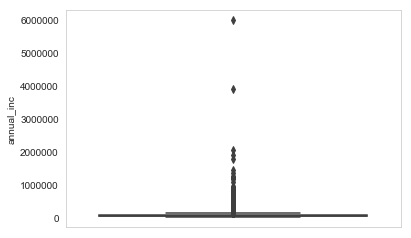

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
[ 24000.  30000.  40404.  59000.  82300. 116000. 142000.]


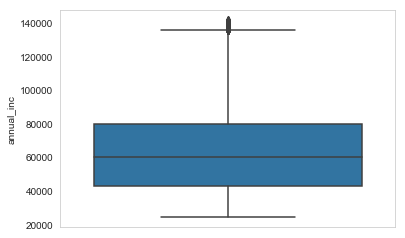

In [16]:
#Analysis of annual_inc
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(y = (df_loan['annual_inc']))
plt.show()

print(df_loan.annual_inc.describe())
print(np.percentile(df_loan.annual_inc, [5, 10, 25, 50, 75, 90, 95]))

#Eliminating outliers by including values that within 5th & 95th percentile
df_annual_inc_5_95 = df_loan[ ( df_loan.annual_inc > 24000 ) & ( df_loan.annual_inc <  142000 ) ]
np.percentile(df_annual_inc_5_95.annual_inc, [5, 10, 25, 50, 75, 90, 95])
df_annual_inc_5_95.annual_inc.describe()

#Plotting the distribution after removing the outliers
sns.boxplot(y = (df_annual_inc_5_95.annual_inc))
plt.show()

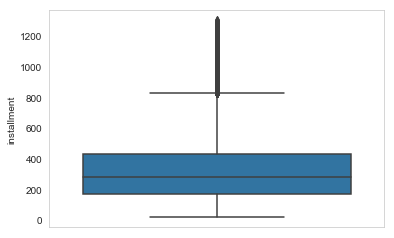

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64
[ 71.246  99.45  167.02  280.22  430.78  622.952 762.996]


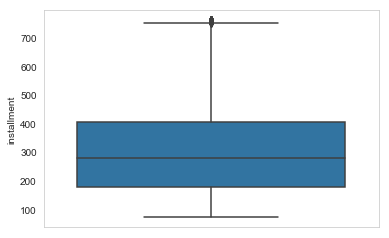

In [17]:
#Analysis of installment

sns.boxplot(y = (df_loan['installment']))
plt.show()

print(df_loan.installment.describe())
print(np.percentile(df_loan.installment, [5, 10, 25, 50, 75, 90, 95]))

#Eliminating outliers by including values that within 5th & 95th percentile
df_install_5_95 = df_loan[ ( df_loan.installment >  71.246 ) & ( df_loan.installment <  762.996 ) ]
np.percentile(df_install_5_95.installment, [5, 10, 25, 50, 75, 90, 95])
df_install_5_95.installment.describe()

#Plotting the distribution after removing the outliers
sns.boxplot(y = (df_install_5_95.installment))
plt.show()

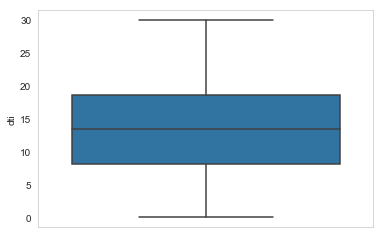

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64
[ 2.13  4.08  8.17 13.4  18.6  22.33 23.84]


In [18]:
#Analysis of dti

sns.boxplot(y = (df_loan.dti))
plt.show()

print(df_loan.dti.describe())
print(np.percentile(df_loan.dti, [5,10,25,50,75,90,95]))

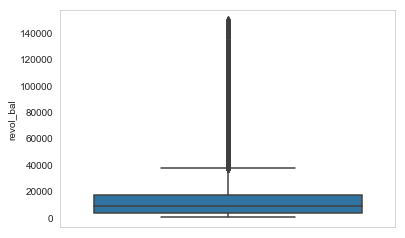

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64
[  321.8  1117.   3703.   8850.  17058.  29144.4 41656.4]


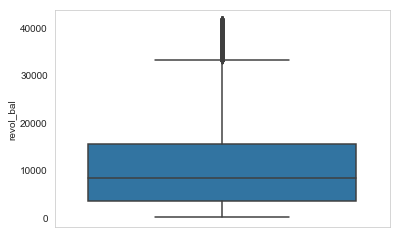

In [19]:
#Analysis of revol_bal

sns.boxplot(y = (df_loan.revol_bal))
plt.show()

print(df_loan.revol_bal.describe())
print(np.percentile(df_loan.revol_bal, [5,10,25,50,75,90,95]))

#Eliminating outliers by including values that are less than 95th percentile
df_revol_bal_95 = df_loan[(df_loan.revol_bal < 41656.4)] 
np.percentile(df_revol_bal_95.revol_bal, [5,10,25,50,75,90,95])
df_revol_bal_95.revol_bal.describe()

sns.boxplot(y = (df_revol_bal_95.revol_bal))
plt.show()

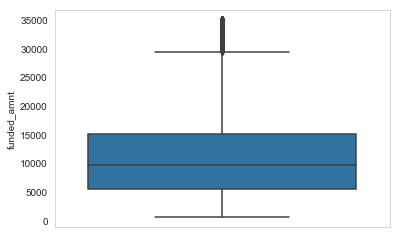

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
[ 2400.  3200.  5400.  9600. 15000. 21000. 25000.]


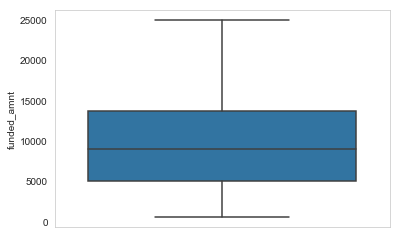

In [20]:
#Analysis of funded_amnt

sns.boxplot(y = (df_loan.funded_amnt))
plt.show()

print(df_loan.funded_amnt.describe())
print(np.percentile(df_loan.funded_amnt, [5, 10, 25, 50, 75, 90, 95]))

#Eliminating outliers by including values that are less than 95th percentile
df_funded_amnt_95 = df_loan[df_loan.funded_amnt < 25000]
np.percentile(df_funded_amnt_95.funded_amnt, [5,10,25,50,75,90,95])
df_funded_amnt_95.funded_amnt.describe()

sns.boxplot(y = (df_funded_amnt_95.funded_amnt))
plt.show()

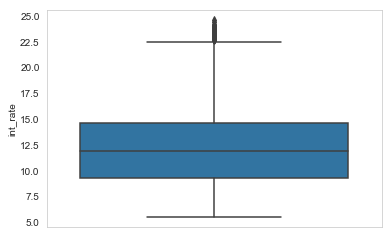

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64
[ 6.17  7.14  9.25 11.86 14.59 16.89 18.54]


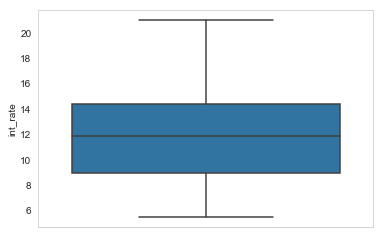

In [21]:
#Analysis for int_rate

sns.boxplot(y = (df_loan.int_rate))
plt.show()

print(df_loan['int_rate'].describe())
print(np.percentile(df_loan['int_rate'], [5,10,25,50,75,90,95]))

#Eliminating outliers by including values that are less than 95th percentile
df_int_rate_95 = df_loan[(df_loan['int_rate'] < 21)]
np.percentile(df_int_rate_95.int_rate, [5,10,25,50,75,90,95])
df_int_rate_95.int_rate.describe()

sns.boxplot(y = (df_int_rate_95.int_rate))
plt.show()

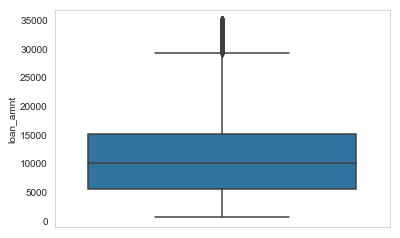

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
[ 2400.  3200.  5500. 10000. 15000. 22000. 25000.]


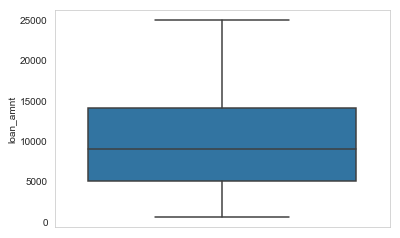

In [22]:
#loan_amnt

sns.boxplot(y = (df_loan.loan_amnt))
plt.show()

print(df_loan.loan_amnt.describe())
print(np.percentile(df_loan.loan_amnt, [5,10,25,50,75,90,95]))

#Eliminating outliers by including values that are less than 95th percentile
df_loan_amnt_95 = df_loan[(df_loan.loan_amnt < 25000)]
np.percentile(df_loan_amnt_95.loan_amnt, [5, 10, 25, 50, 75, 90, 95])

df_loan_amnt_95.loan_amnt.describe()

sns.boxplot( y = (df_loan_amnt_95.loan_amnt))
plt.show()

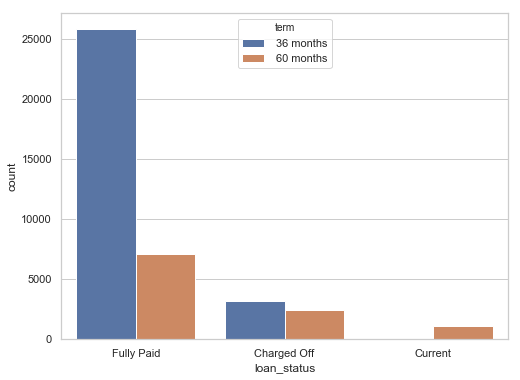

In [23]:
#Loan_status by term
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.countplot(x="loan_status", data=df_loan, hue="term")

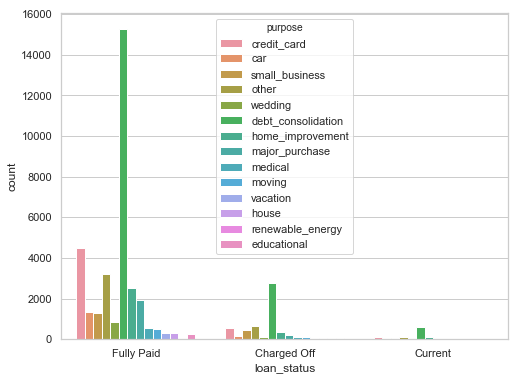

In [24]:
#Loan_status by purpose
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.countplot(x="loan_status", data=df_loan, hue="purpose")

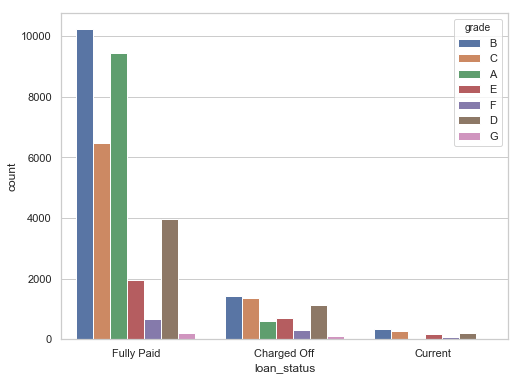

In [25]:
#Loan_status by grade
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.countplot(x="loan_status", data=df_loan, hue="grade")

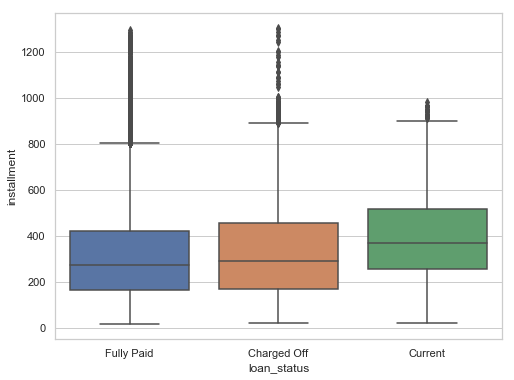

In [26]:
#Distribution of installment by loan_status
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["installment"])
# OBSERVATTION: For charged off loans, the 75% percentile data is higher

[  82300.    142000.    165757.92  234999.36 6000000.  ]


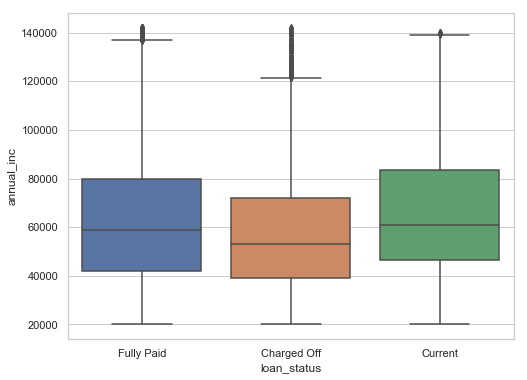

In [27]:
#Distribution of annual_inc b loan_status
print(np.percentile(df_loan["annual_inc"],[75,95,97,99,100]))
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
df=df_loan[(df_loan["annual_inc"]<=142000) & (df_loan["annual_inc"]>20000)]
ax = sns.boxplot(x=df["loan_status"] ,y=df["annual_inc"])

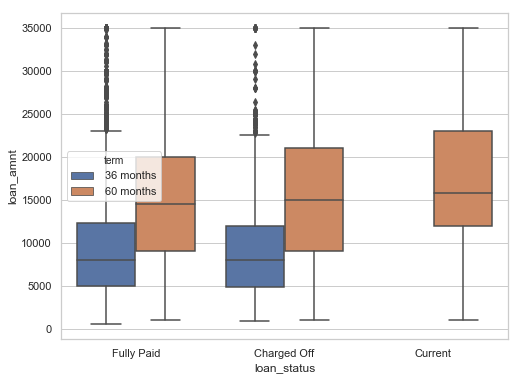

In [28]:
#Distribution of loan_amnt by loan_status
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["loan_amnt"], hue=df_loan['term'])
#OBSERVATION: Loan amount between the charged off and fully paid are almost same, this is not a driver

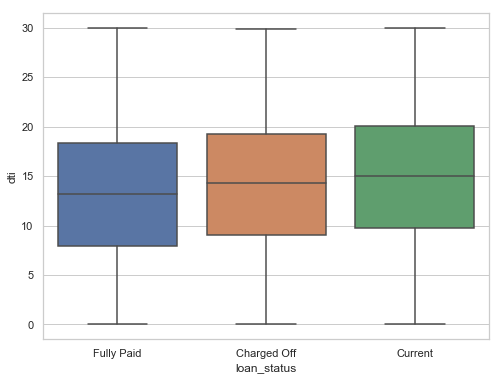

In [29]:
#Distribution of dti by loan_status
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["dti"])
#OBSERVATION: dti could be a driver

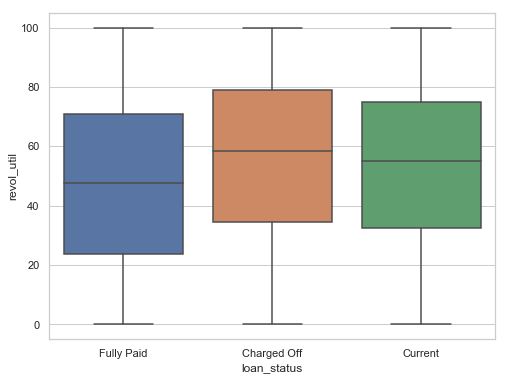

In [30]:
#Distribution of revol_util by loan_status
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["revol_util"])
#OBSERVATION: revol_util could be a driver

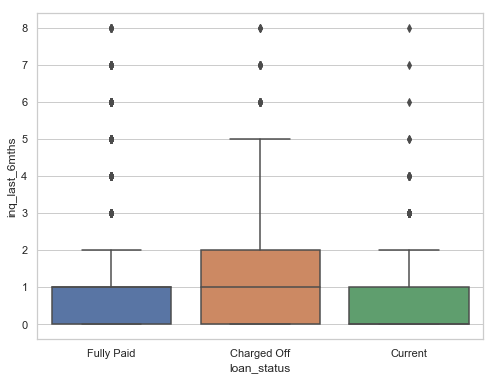

In [31]:
#Distribution of inq_last_6mths
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["inq_last_6mths"])

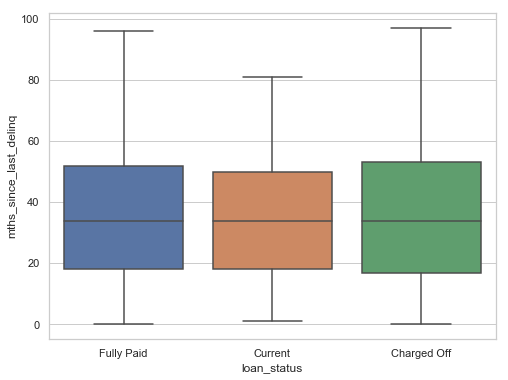

In [32]:
#Distribution of mths_since_last_delinq by loan_status
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
df=df_loan[df_loan["mths_since_last_delinq"]<100]
ax = sns.boxplot(x=df["loan_status"] ,y=df["mths_since_last_delinq"])


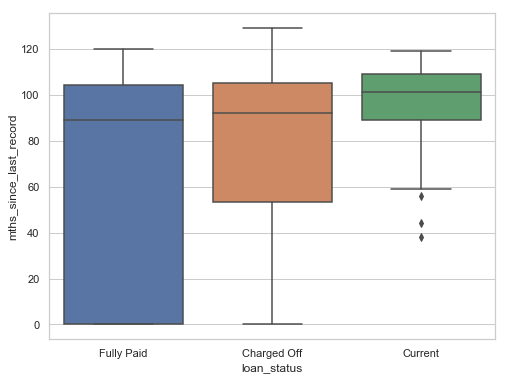

In [33]:
#Distribution of mths_since_last_record by loan_status
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["mths_since_last_record"])

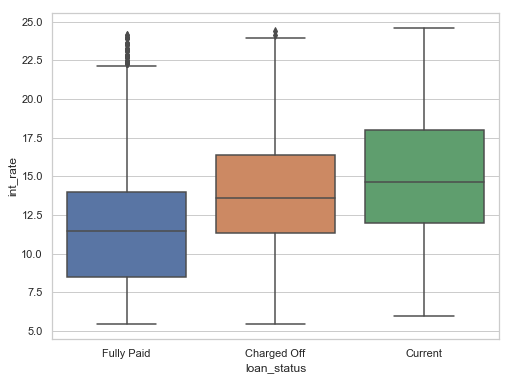

In [34]:
#Distribution of int_rate by loan_status
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["int_rate"])
#OBSERVATION: int_rate is a driver

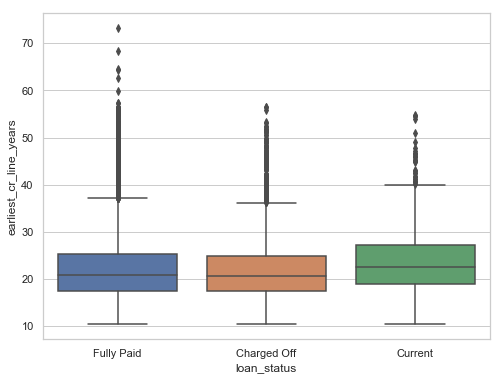

count    39717.000000
mean        22.196373
std          6.833768
min         10.412164
25%         17.580005
50%         20.917514
75%         25.413157
max         73.247130
Name: earliest_cr_line_years, dtype: float64
[13.2458982  14.4971217  17.58000499 20.91751364 25.41315694 31.24763677
 35.24771891]
[13.16102309 14.41224659 17.49786778 20.58075107 24.75058345 29.33110187
 31.83354887]


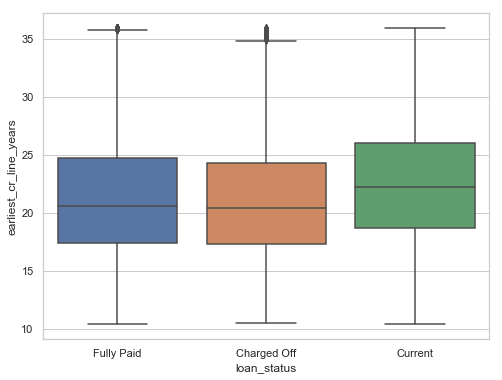

In [35]:
## Analysis of earliest_cr_line
timediff = datetime.datetime.now() - df_loan['earliest_cr_line']

df_loan['earliest_cr_line_years'] = timediff / np.timedelta64(1,'Y')
df_loan['earliest_cr_line_months'] = timediff / np.timedelta64(1,'M')

df_loan[['earliest_cr_line','earliest_cr_line_years','earliest_cr_line_months']].head()

#Distribution of earliest_cr_line_years by loan_status
sns.set(style="whitegrid",rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["earliest_cr_line_years"])
plt.show()

print(df_loan.earliest_cr_line_years.describe())
print(np.percentile(df_loan.earliest_cr_line_years, [5,10,25,50,75,90,95]))

#Eliminating outliers by including values that are less than 95th percentile
df_ecrline_95 = df_loan[(df_loan.earliest_cr_line_years < 36)]
print(np.percentile(df_ecrline_95.earliest_cr_line_years, [5, 10, 25, 50, 75, 90, 95]))

df_ecrline_95.earliest_cr_line_years.describe()

sns.boxplot( x=df_ecrline_95["loan_status"], y = (df_ecrline_95.earliest_cr_line_years))
plt.show()
#OBSERVATION: Based on the distribution, earliest_cr_line is not a driver variable



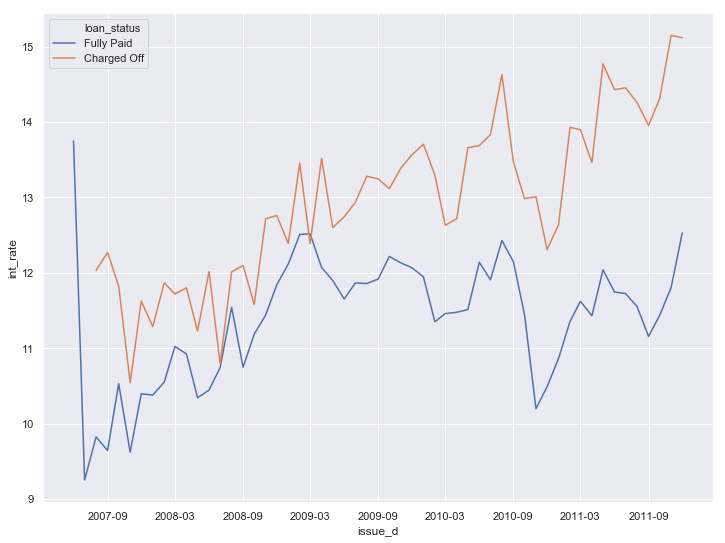

In [36]:
#Interest rate fluctuations over time
df_int_rate = df_loan[['issue_d','int_rate','loan_status']]
df_int_rate['issue_d_year'] = df_loan['issue_d'].dt.year
df_int_rate['issue_d_month'] = df_loan['issue_d'].dt.month
df_filtered = df_int_rate[df_int_rate['loan_status'] != 'Current']
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.lineplot(x="issue_d", y="int_rate",ci=None,hue="loan_status",data=df_filtered)


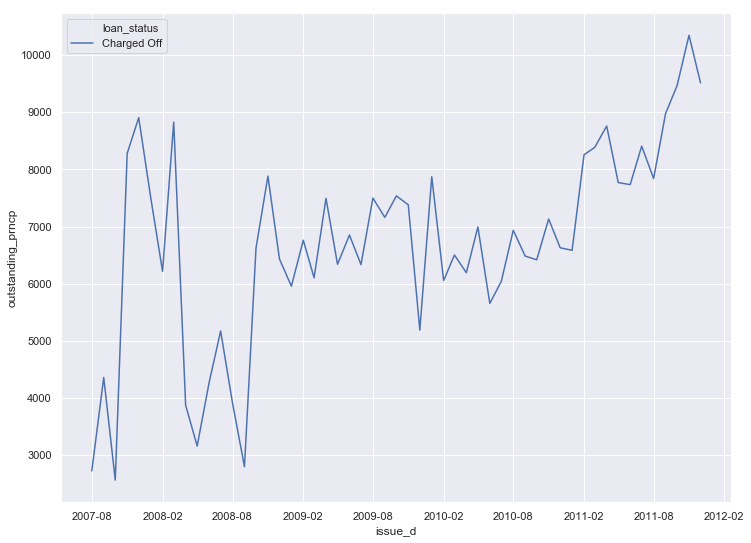

In [37]:
#Need discussion - upward trend in outstanding principal over time for charged off loans 
df1 = df_loan[['loan_status','issue_d','loan_amnt','funded_amnt','total_pymnt','out_prncp','out_prncp_inv','total_rec_prncp']]
df1['outstanding_prncp'] = df1['funded_amnt'] - df1['total_rec_prncp']

df2 = df1[df1['loan_status']=='Charged Off']

sns.set(rc={'figure.figsize':(12,9)})
ax = sns.lineplot(x="issue_d", y="outstanding_prncp",ci=None,hue="loan_status",data=df2)

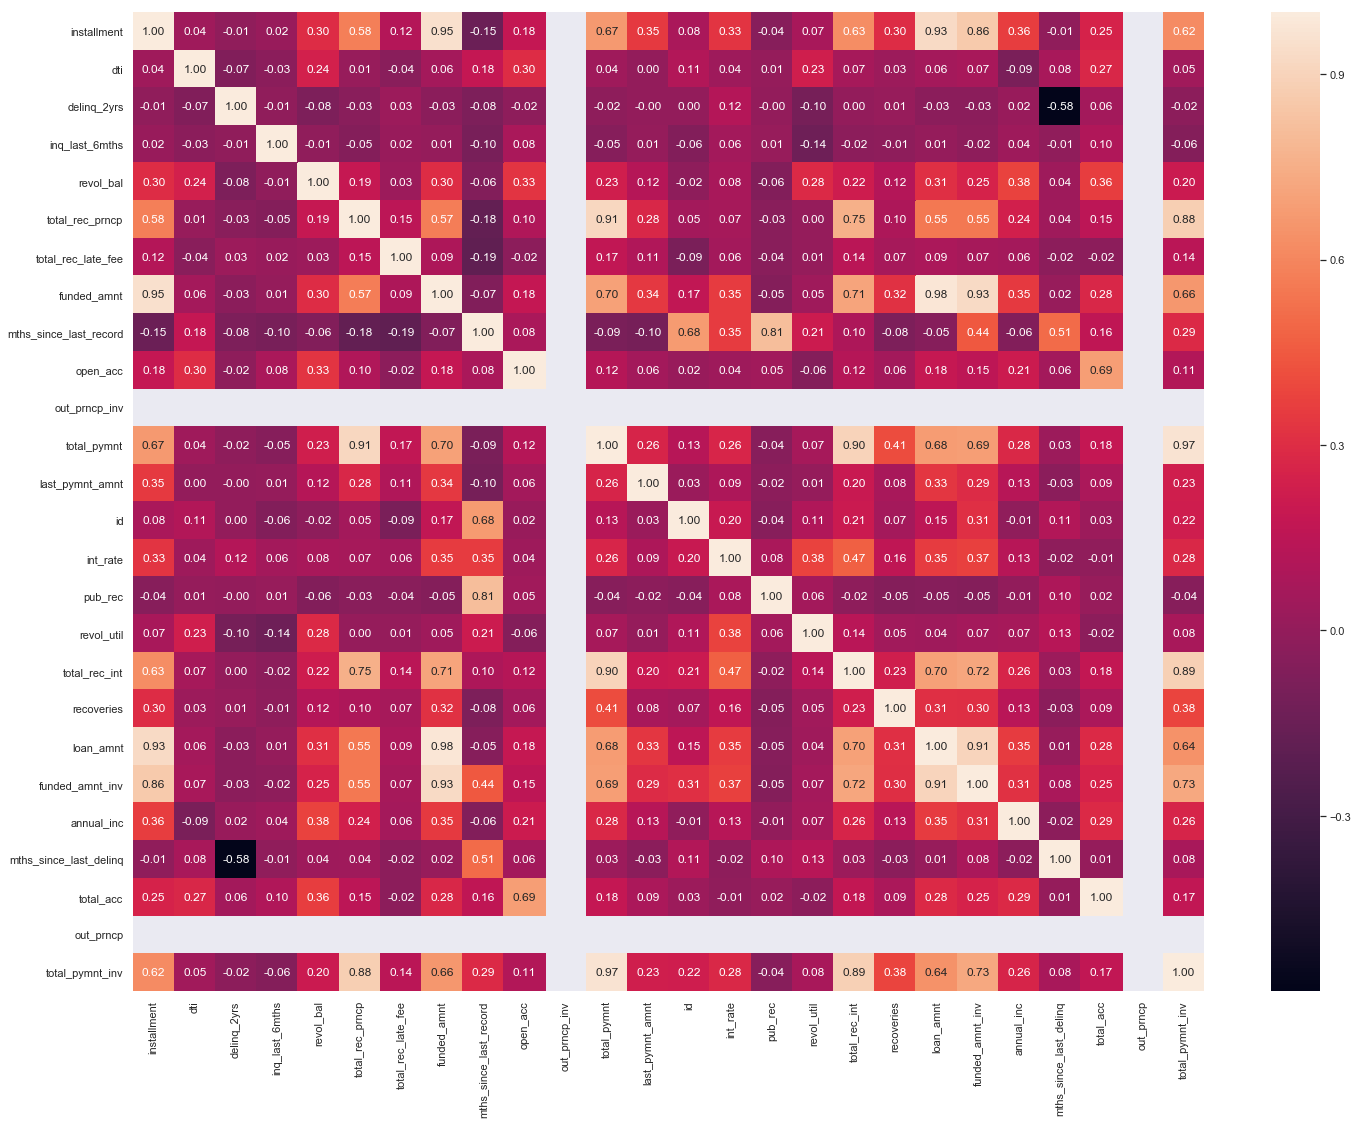

In [38]:
df_numeric1 = df_loan[['installment',
                      'dti',
                      'delinq_2yrs',
                      'inq_last_6mths',
                      'revol_bal',
                      'total_rec_prncp',
                      'total_rec_late_fee',
                      'funded_amnt',
                      'mths_since_last_record',
                      'open_acc',
                      'out_prncp_inv',
                      'total_pymnt',
                      'last_pymnt_amnt',
                      'id',
                      'int_rate',
                      'pub_rec',
                      'revol_util',
                      'total_rec_int',
                      'recoveries',
                      'loan_amnt',
                      'funded_amnt_inv',
                      'annual_inc',
                      'mths_since_last_delinq',
                      'total_acc',
                      'out_prncp',
                      'total_pymnt_inv',
                      'loan_status']]
sns.set(rc={'figure.figsize':(24,18)})
df_numeric_ch_off = df_numeric1[df_numeric1['loan_status']=='Charged Off']
sns.heatmap(df_numeric_ch_off.corr(), annot=True, fmt=".2f")
plt.show()

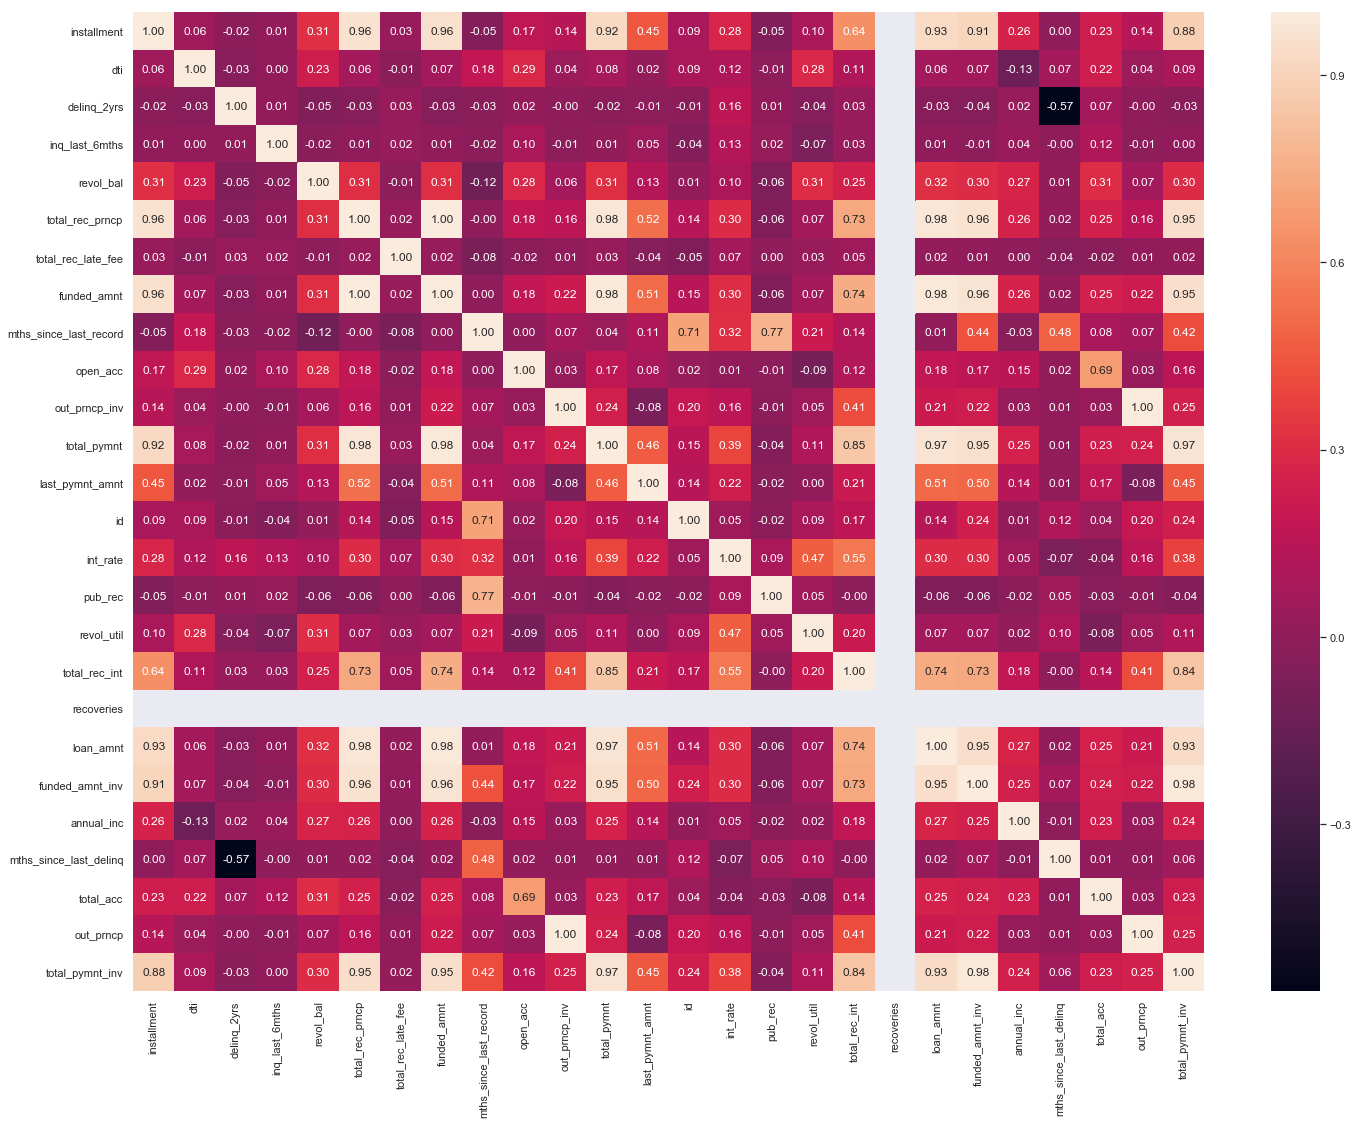

In [39]:
df_numeric2 = df_loan[['installment',
                      'dti',
                      'delinq_2yrs',
                      'inq_last_6mths',
                      'revol_bal',
                      'total_rec_prncp',
                      'total_rec_late_fee',
                      'funded_amnt',
                      'mths_since_last_record',
                      'open_acc',
                      'out_prncp_inv',
                      'total_pymnt',
                      'last_pymnt_amnt',
                      'id',
                      'int_rate',
                      'pub_rec',
                      'revol_util',
                      'total_rec_int',
                      'recoveries',
                      'loan_amnt',
                      'funded_amnt_inv',
                      'annual_inc',
                      'mths_since_last_delinq',
                      'total_acc',
                      'out_prncp',
                      'total_pymnt_inv',
                      'loan_status']]
sns.set(rc={'figure.figsize':(24,18)})
df_numeric_nch_off = df_numeric2[df_numeric2['loan_status'] !='Charged Off']
sns.heatmap(df_numeric_nch_off.corr(), annot=True, fmt=".2f")
plt.show()

### Correlation Analysis
In the previous 2 cells we performed a correlation analysis of all the numeric columns by sub-setting the data into two different categories to check if there are any correlations of interest
1. Charged Off Loans
2. Loans that were not charged off (loan_status is either Current or Fully Paid)

We compared the cells with high correlation (>0.90) and found the following correlations:

1.Charged Off
installment --> funded_amnt, loan_amnt
total_rec_prncp --> total_pymnt
funded_amnt --> loan_amnt, funded_amnt_inv
total_pymnt --> total_rec_int,total_pymnt_inv
loan_amnt --> funded_amnt_inv

2.Not Charged Off
installment --> total_rec_prncp, funded_amnt, total_pymnt, loan_amnt,funded_amnt_inv
total_rec_prncp --> funded_amnt, total_pymnt, loan_amnt, funded_amnt_inv, total_pymnt_inv
funded_amnt --> total_pymnt, loan_amnt, funded_amnt_inv, total_pymnt_inv
out_prncp --> out_prncp_inv
total_pymnt --> loan_amnt, funded_amnt_inv, total_pymnt_inv
loan_amnt --> funded_amnt_inv, total_pymnt_inv
funded_amnt_inv --> total_pymnt_inv

However as we did not find anything interesting beyond the obvious correlations, we did not proceed further in this direction.



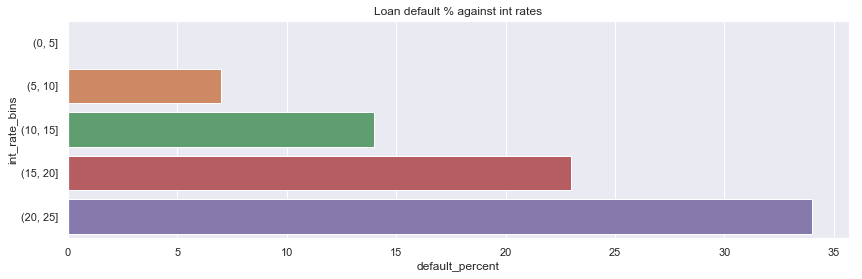

In [40]:
# Analyzing loan default against interest rates
fig, ax = plt.subplots()
fig.set_size_inches(14, 4)
df_loan_int = pd.DataFrame({'default_percent' : round(df_loan.groupby(['int_rate_bins'])['loan_default'].sum()/df_loan.groupby(['int_rate_bins'])['loan_default'].count(),2)*100}).reset_index()
ax = sns.barplot(x="default_percent",y="int_rate_bins",data=df_loan_int).set_title('Loan default % against int rates')

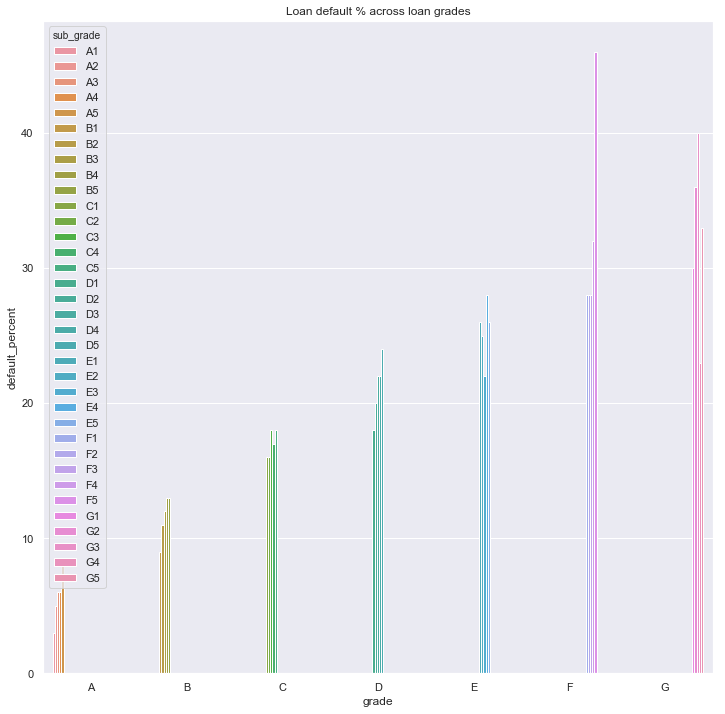

In [41]:
# Analyzing loan default against grades
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
df_loan_grade = pd.DataFrame({'default_percent' : round(df_loan.groupby(['grade','sub_grade'])['loan_default'].sum()/df_loan.groupby(['grade','sub_grade'])['loan_default'].count(),2)*100}).reset_index()
ax = sns.barplot(x="grade",y="default_percent",hue='sub_grade',data=df_loan_grade).set_title('Loan default % across loan grades')

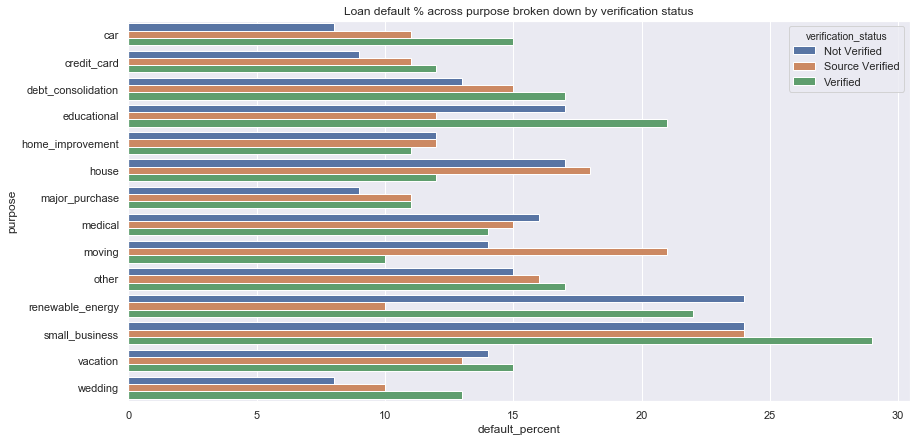

In [42]:
# Analyzing loan default against verification status, purpose
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_vs = pd.DataFrame({'default_percent' : round(df_loan.groupby(['verification_status','purpose'])['loan_default'].sum()/df_loan.groupby(['verification_status','purpose'])['loan_default'].count(),2)*100}).reset_index()
ax = sns.barplot(x="default_percent",y="purpose",hue='verification_status',data=df_loan_vs).set_title('Loan default % across purpose broken down by verification status')
#ax = sns.barplot(x="default_percent",y="verification_status",data=df_loan_vs).set_title('TBD')

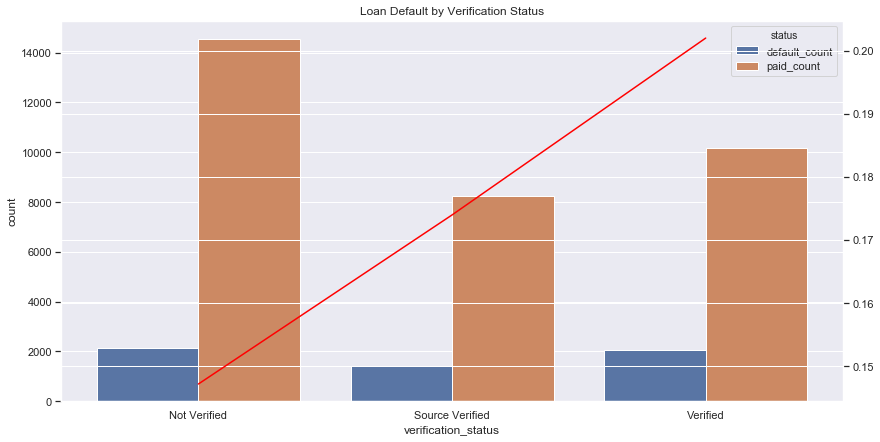

In [43]:
# Create segment plot to understand default against verification status
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_vs = pd.DataFrame({'default_count' : df_loan.groupby(['verification_status'])['loan_default'].sum(), 'paid_count' : df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['verification_status'])['loan_default'].count()}).reset_index()
df_loan_vs1 = pd.melt(df_loan_vs, id_vars=["verification_status"], 
                  var_name="status", value_name="count")
df_loan_vs1
ax = sns.barplot(x="verification_status",y="count",hue="status",data=df_loan_vs1,ci=None)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="verification_status",y=df_loan_vs['default_count']/df_loan_vs['paid_count'],ax=ax2,color="red",data=df_loan_vs,ci=None).set_title('Loan Default by Verification Status')
plt.show()

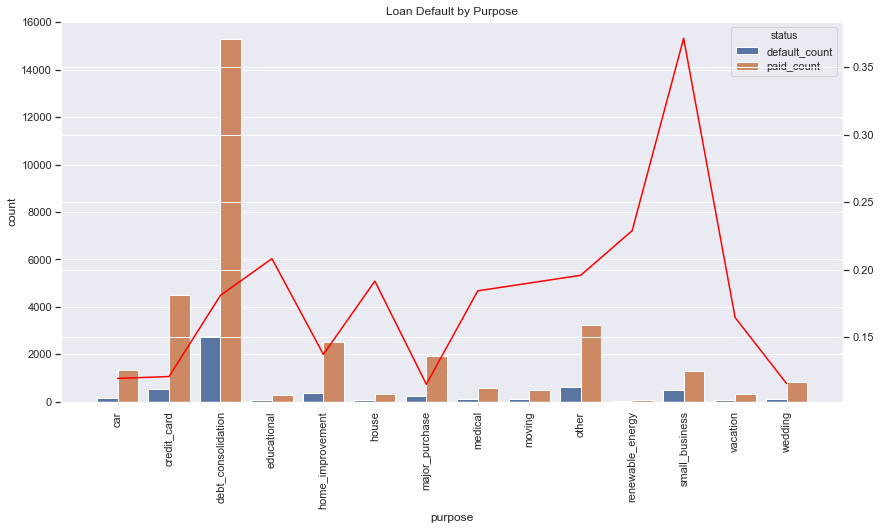

In [44]:
#Create segment plot to understand default against purpose
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_ps = pd.DataFrame({'default_count' : df_loan.groupby(['purpose'])['loan_default'].sum(), 'paid_count' : df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['purpose'])['loan_default'].count()}).reset_index()
df_loan_ps1 = pd.melt(df_loan_ps, id_vars=["purpose"], 
                  var_name="status", value_name="count")
ax = sns.barplot(x="purpose",y="count",hue="status",data=df_loan_ps1,ci=None)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="purpose",y=df_loan_ps['default_count']/df_loan_ps['paid_count'],ax=ax2,color="red",data=df_loan_ps,ci=None).set_title('Loan Default by Purpose')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

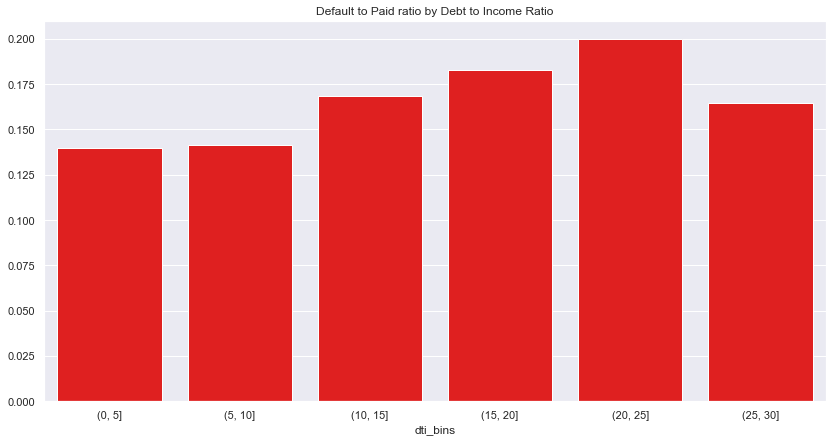

In [45]:
# Analyzing loan default against dti
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_dti = pd.DataFrame({'default_percent' : round(df_loan.groupby(['dti_bins'])['loan_default'].sum()/df_loan.groupby(['dti_bins'])['loan_default'].count(),2)*100, 'paid_percent' : round(df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['dti_bins'])['loan_default'].count()/df_loan.groupby(['dti_bins'])['loan_default'].count(),2)*100}).reset_index()
df_loan_dti1 = pd.melt(df_loan_dti, id_vars=["dti_bins"], 
                  var_name="status", value_name="percent")
ax = sns.barplot(x="dti_bins",y=df_loan_dti['default_percent']/df_loan_dti['paid_percent'],color="red",data=df_loan_dti,ci=None).set_title('Default to Paid ratio by Debt to Income Ratio')
plt.show()

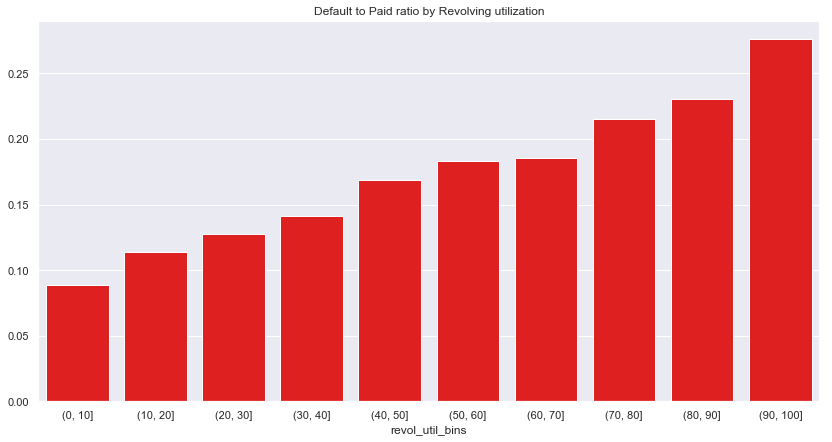

In [46]:
# Analyzing loan default against revolving utilization
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_ru = pd.DataFrame({'default_percent' : round(df_loan.groupby(['revol_util_bins'])['loan_default'].sum()/df_loan.groupby(['revol_util_bins'])['loan_default'].count(),2)*100, 'paid_percent' : round(df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['revol_util_bins'])['loan_default'].count()/df_loan.groupby(['revol_util_bins'])['loan_default'].count(),2)*100}).reset_index()
df_loan_ru1 = pd.melt(df_loan_ru, id_vars=["revol_util_bins"], 
                  var_name="status", value_name="percent")
ax = sns.barplot(x="revol_util_bins",y=df_loan_ru['default_percent']/df_loan_ru['paid_percent'],color="red",data=df_loan_ru,ci=None).set_title('Default to Paid ratio by Revolving utilization')
plt.show()

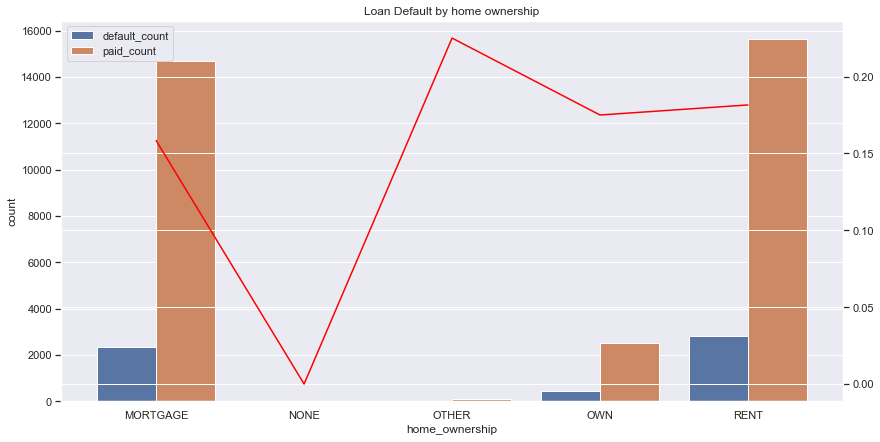

In [47]:
# Create segment plot to understand default against home ownership
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

df_loan_ho = pd.DataFrame({'default_count' : df_loan.groupby(['home_ownership'])['loan_default'].sum(), 'paid_count' : df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['home_ownership'])['loan_default'].count()}).reset_index()
df_loan_ho1 = pd.melt(df_loan_ho, id_vars=["home_ownership"], 
                  var_name="status", value_name="count")
ax = sns.barplot(x="home_ownership",y="count",hue="status",data=df_loan_ho1)
plt.legend(loc='upper left')
ax2 = ax.twinx()
ax2 = sns.lineplot(x="home_ownership",y=df_loan_ho['default_count']/df_loan_ho['paid_count'],ax=ax2,color="red",data=df_loan_ho,ci=None).set_title('Loan Default by home ownership')
plt.show()

In [75]:
df_loan_an_inc=df_loan[(df_loan["annual_inc"]<=142000) & (df_loan["annual_inc"]>20000)]
bins = [25000,50000,75000,100000,1500000] 
df_loan_an_inc['annual_inc_bins'] = pd.cut(df['annual_inc'], bins=bins) 
df_loan_an_inc['annual_inc_bins'].head()
df_loan_an_inc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,earliest_cr_line,loan_default,int_rate_bins,dti_bins,revol_util_bins,earliest_cr_line_years,earliest_cr_line_months,annual_inc_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,0.0,1985-01-01,0,"(10, 15]","(25, 30]","(80, 90]",34.245645,410.947739,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,0.0,1999-04-01,1,"(15, 20]","(0, 5]","(0, 10]",20.000315,240.003777,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,0.0,1996-02-01,0,"(10, 15]","(15, 20]","(20, 30]",23.162597,277.951169,"(25000, 50000]"
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,0.0,1996-01-01,0,"(10, 15]","(15, 20]","(50, 60]",23.247472,278.969670,"(75000, 100000]"
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0.0,0.0,2004-11-01,0,"(5, 10]","(10, 15]","(20, 30]",14.412247,172.946959,NaN


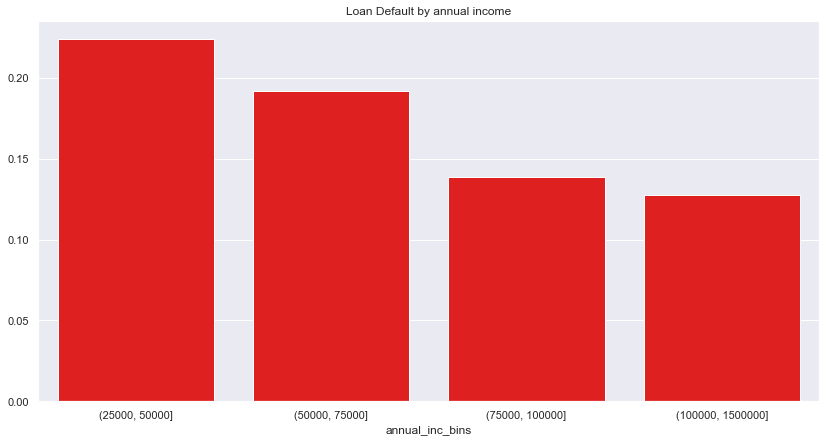

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_an_inc = pd.DataFrame({'default_count' : df_loan_an_inc.groupby(['annual_inc_bins'])['loan_default'].sum(), 'paid_count' : df_loan_an_inc[df_loan_an_inc['loan_status']=='Fully Paid'].groupby(['annual_inc_bins'])['loan_default'].count()}).reset_index()
df_loan_an_inc.head()
ax2 = sns.barplot(x="annual_inc_bins",y=df_loan_an_inc['default_count']/df_loan_an_inc['paid_count'],color="red",data=df_loan_an_inc).set_title('Loan Default by annual income')
plt.show()

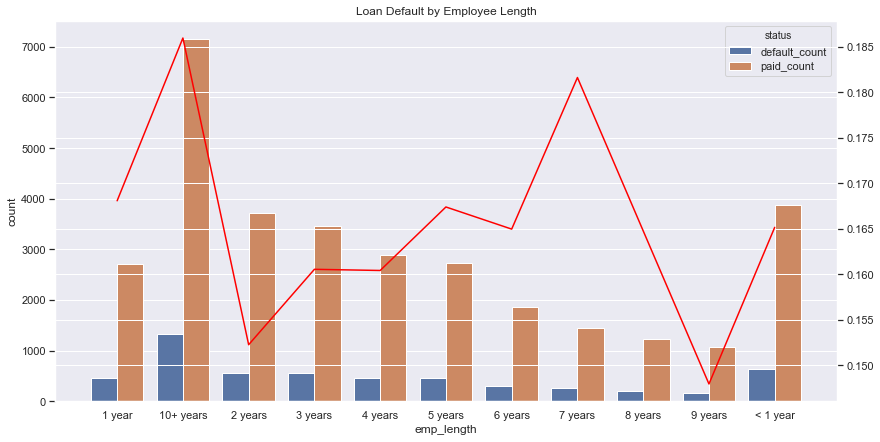

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_el = pd.DataFrame({'default_count' : df_loan.groupby(['emp_length'])['loan_default'].sum(), 'paid_count' : df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['emp_length'])['loan_default'].count()}).reset_index()
df_loan_el1 = pd.melt(df_loan_el, id_vars=["emp_length"], 
                  var_name="status", value_name="count")
ax = sns.barplot(x="emp_length",y="count",hue="status",data=df_loan_el1)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="emp_length",y=df_loan_el['default_count']/df_loan_el['paid_count'],ax=ax2,color="red",data=df_loan_el,ci=None).set_title('Loan Default by Employee Length')
plt.show()